# Weather Prediction - Ensemble Method
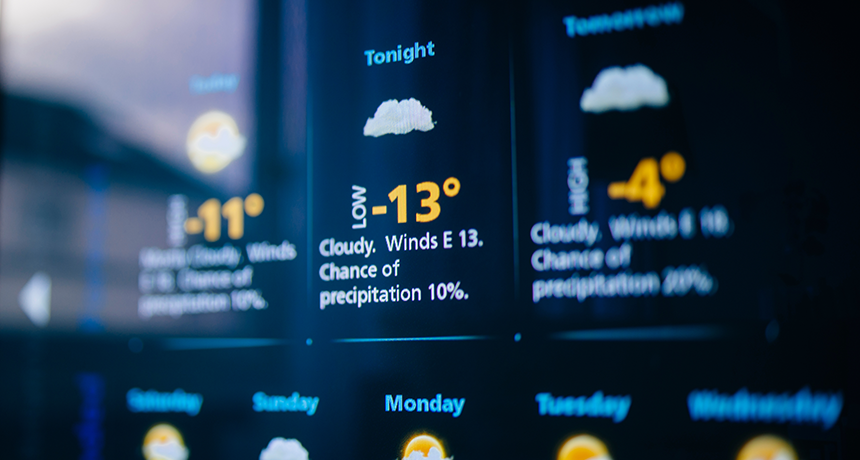

## 1. INTRODUCTION

**Objective of this Notebook:**

***This notebook aims to:***
* Analyse Each and Every ***Attributes*** in the data set.
* Build Various ***ML Models*** with the view of ***increasing accuracy*** of the Model. 


The ***Machine learning Models used*** are:

    1.K-Nearest Neighbour(KNN)
    
    2.Support Vector Machine(SVM)
    
    3.Gradient Boost
    
    4.Extreme Gradient Boosting(XGBC)

In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2.**IMPORTING THE REQUIRED LIBRARIES**

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import warnings
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 3.**ANALYSING THE DATASET**

There are **6 Variables** in this Dataset:
* **4 Continuous** Variables.
* **1 Variable** to accommodate the Date.
* **1 Variable** refers the Weather.

In [135]:
data=pd.read_csv("seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [136]:
data.shape

(1461, 6)

As of it has **6 Columns** with total of **1461 Rows** as our observations in the Data set. 

# 4.**DATA EXPLORATION**

It is the process of Exploring the data from the **"RAW"** data set tha we have taken or Imported.

First let us Deal with the Categorical variables 

<AxesSubplot:xlabel='weather', ylabel='count'>

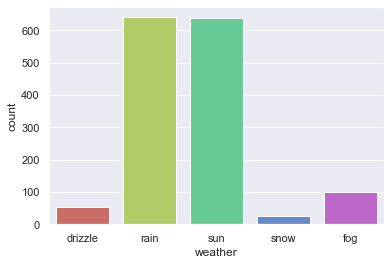

In [137]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot("weather",data=data,palette="hls")

In [138]:
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


From the Above countplot the data set contains higher amount of data with the weather datail of ***Rain and Sun*** and it also have some additionals like ***drizzle,snow and fog*** .

# 5.**NUMERICAL OR CONTINUOUS VARIABLES**

  Next we will explore the ***Continuous variables***

In [139]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Distribution of numerical value using ***Histogram and Violin plot .***

<AxesSubplot:xlabel='wind', ylabel='Count'>

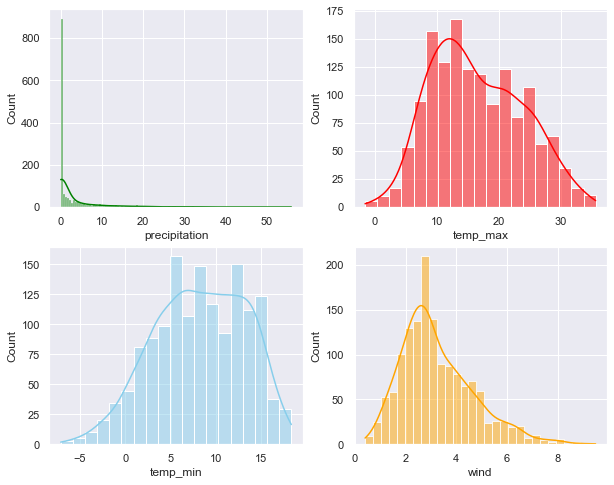

In [140]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

From the above distribution it is clear that **precipitation and wind** are **Positively skewed.**

And **temp_min** is **Negatively skewed** and both has some***outliers.***

# 6.**HOW TO FIND THE OUTILERS OR SKEW IN DATA SET?**



* ***We can find the outliers in the dataset by using following plots:***

  1.**Hist plot**
  
  2.**Box plot**
  
  3.**Violin plot**
  
  4.**Dist plot**
yet both ***box and violin plots*** are easier to handel with.

# 6.1.***VIOLIN PLOT***

<AxesSubplot:xlabel='wind'>

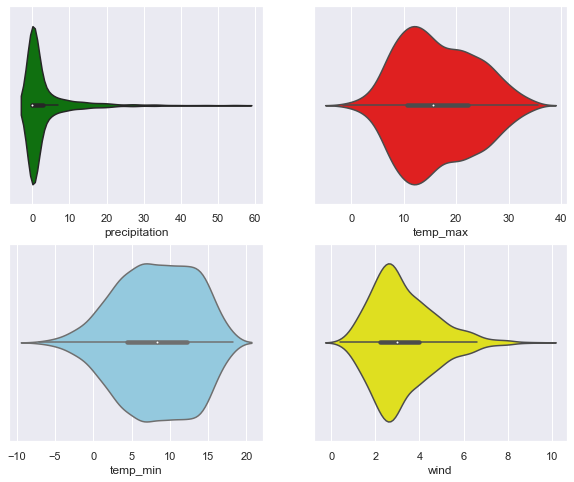

In [141]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

From the above ***Violin plot*** we can clearly understand the Skewness of the Data as the **TAIL** indicates the skewness.

# 6.2.*BELOW DIAGRAM SHOWS THE EXACT OF HOW THE* **SKEWNESS LOOKS:**

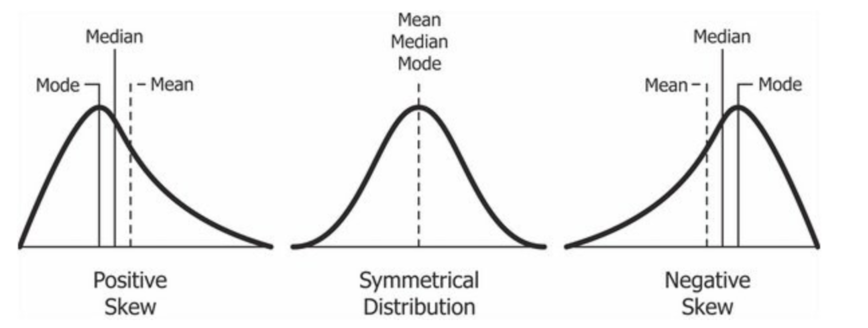

# 6.3.***SKEWNESS USING BOXPLOT***

**OTHER EXPLORATION**

<AxesSubplot:xlabel='precipitation', ylabel='weather'>

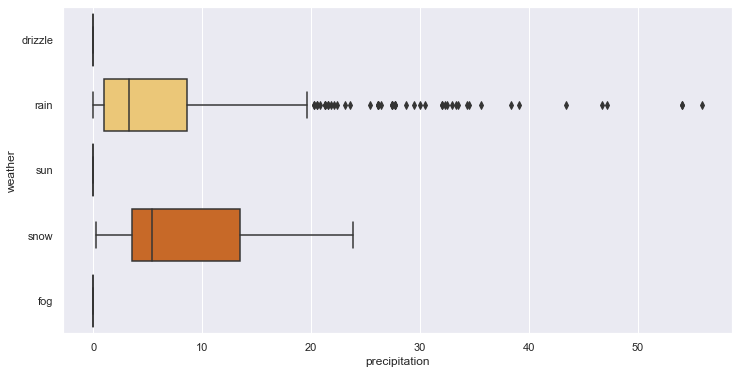

In [142]:
plt.figure(figsize=(12,6))
sns.boxplot("precipitation","weather",data=data,palette="YlOrBr")

From the above box plot between the ***Weather and Precipitation*** 
the value ***Rain*** has many **positive outliers** and both **Rain and Snow** were ***positively skewed/has positive skewness***.

<AxesSubplot:xlabel='temp_max', ylabel='weather'>

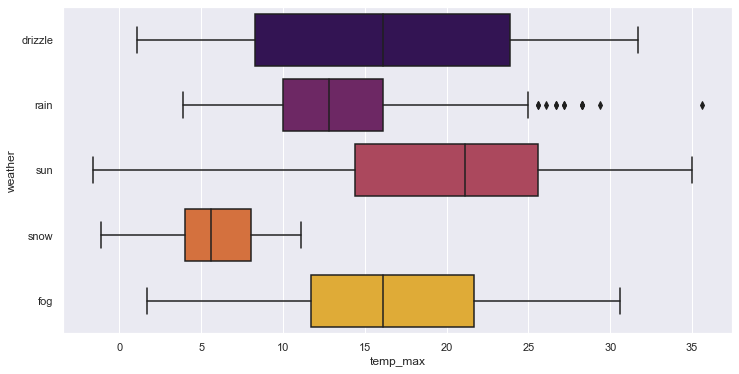

In [143]:
plt.figure(figsize=(12,6))
sns.boxplot("temp_max","weather",data=data,palette="inferno")

<AxesSubplot:xlabel='wind', ylabel='weather'>

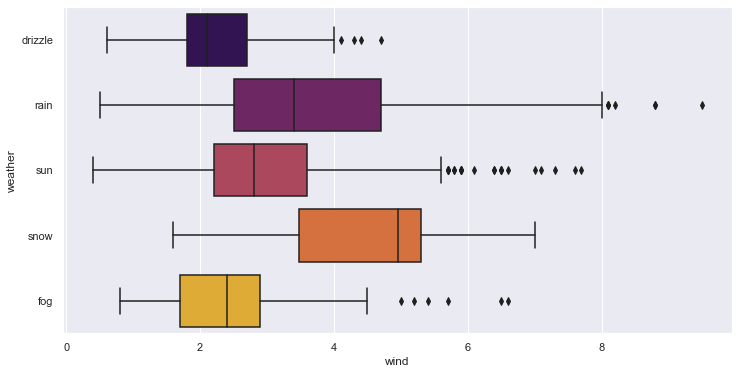

In [144]:
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=data,palette="inferno")

From the above box plots ,we came to know that Every ***attribute of weather*** has some ***positive outliers** and it is ***both types of skewness***.

<AxesSubplot:xlabel='temp_min', ylabel='weather'>

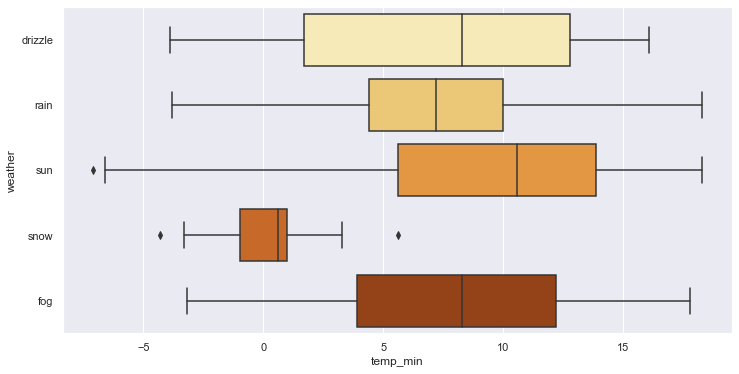

In [145]:
plt.figure(figsize=(12,6))
sns.boxplot("temp_min","weather",data=data,palette="YlOrBr")

here some data has ***negative*** and some have both ***positive and negative*** outliers and ***snow is negatively skewed.
***SKEWNESS AND ITS CORRECTIONS:***

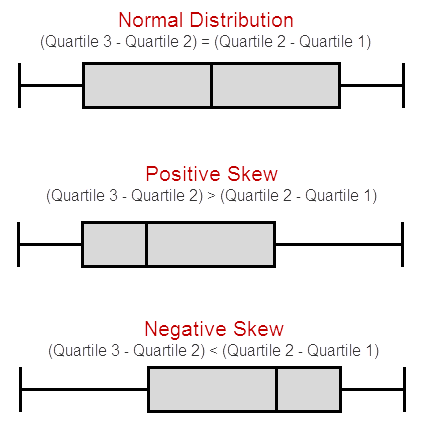

**HEATMAP:**

<AxesSubplot:>

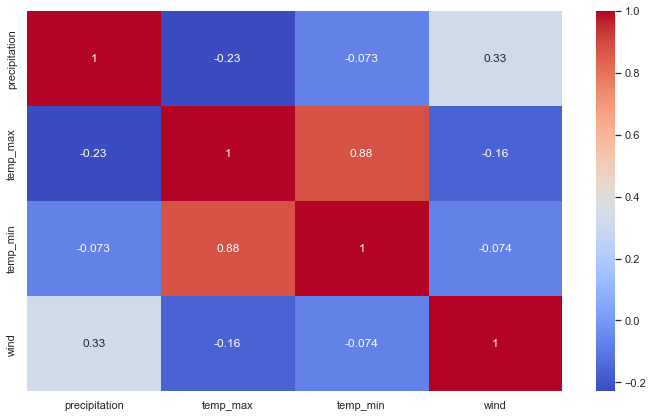

In [146]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

There is a ***positive correlation*** between ***temp_max and temp_min***.

**Numerical - Numerical**

Pearson correlation: -0.22855481643297046
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


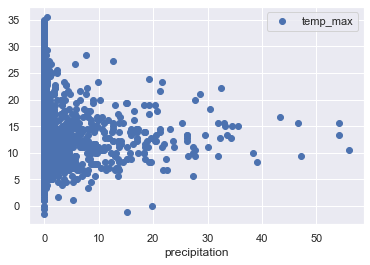

In [147]:
data.plot("precipitation","temp_max",style='o') 
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["temp_max"]))

Pearson correlation: -0.16485663487495486
T Test and P value: Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


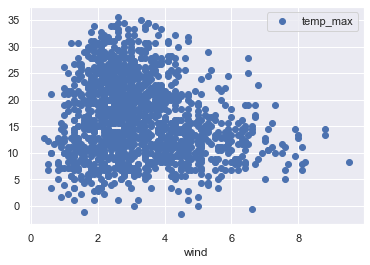

In [148]:
data.plot("wind","temp_max",style='o') 
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))

As from the above result of ***T test and P value of 0*** indicates that the ***Null hypothesis*** in the corresponding columns is **rejected** and the columns are ***Statistically significant*** 

<AxesSubplot:xlabel='temp_max'>

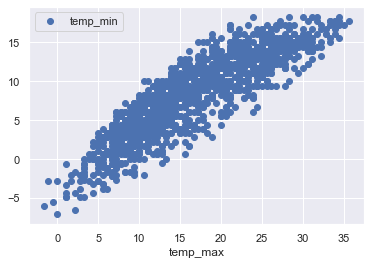

In [149]:
data.plot("temp_max","temp_min",style='o') 

# 7.NULL VALUES:

In [150]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

**Checking for Null values in the data set**

The below plot shows that all the columns in the data set ***doesn't contains Null values*** as each columns contains a ***total of 1461*** observations.

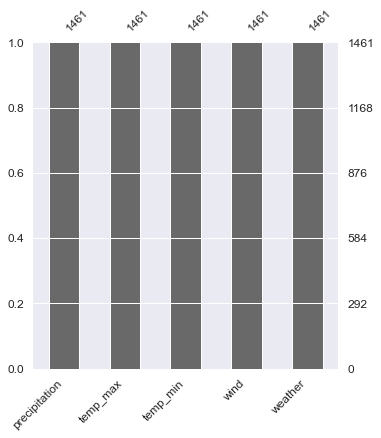

In [151]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(["date"],axis=1),ax=axz,fontsize=12);

# 8.DATA PREPROCESSING:

**Drop Unnecessary Variables**

In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.

In [152]:
df=data.drop(["date"],axis=1)

**Remove Outliers & Infinite Values**

Since this dataset contains ***Outliers ,it will be removed***,to make data set more even.

In [153]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

***Skewed Distribution Treatment***

In [154]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<AxesSubplot:xlabel='wind', ylabel='Count'>

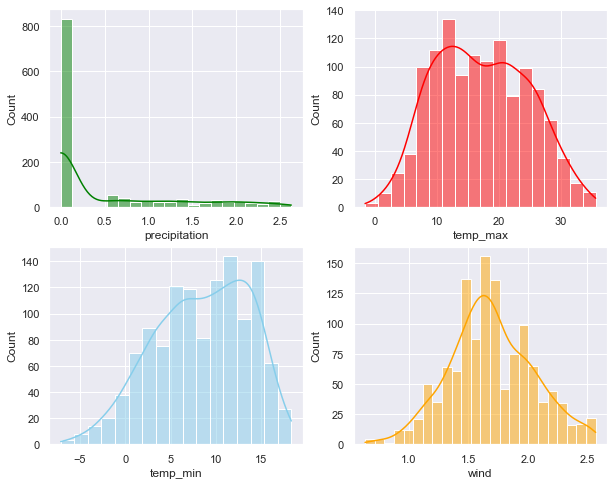

In [155]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [156]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


***Scaling the weather variables using label Encoder:***

In [157]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [158]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


***SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES:***

In [159]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [160]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

***Confusion metrics:***

In [162]:
def plot_confusion_matrix(model, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    conf_matrix= pd.DataFrame(data= cm, columns= ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4'],
                             index= ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4'])
    sns.heatmap(conf_matrix, annot= True, fmt='d', cmap= ListedColormap(['lightskyblue']),
               cbar= False, linewidths=0.1, annot_kws={'size': 25})
    
    plt.xticks(fontsize=15, rotation=45)
    plt.yticks(fontsize=15, rotation=45)
    
    plt.show()

# 9.ALGORITHMS AND MODEL TRAINING:

**K-NEAREST NEIGHBOR CLASSIFIER:**

KNN Accuracy:79.03%


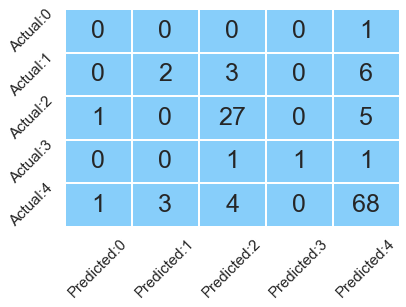

**************** CLASSIFICATION REPORT ****************
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.40      0.18      0.25        11
           2       0.77      0.82      0.79        33
           3       1.00      0.33      0.50         3
           4       0.84      0.89      0.87        76

    accuracy                           0.79       124
   macro avg       0.60      0.45      0.48       124
weighted avg       0.78      0.79      0.78       124
 
*******************************************************


In [163]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))
y_pred_knn = knn.predict(x_test)
plot_confusion_matrix(knn, y_pred_knn)
clrp = classification_report(y_test, y_pred_knn)
print('{} {} {}\n {} \n{}'.format('*'*16, 'CLASSIFICATION REPORT', '*'*16, clrp, '*'*55))

**SUPPORT VECTOR MACHINE - CLASSIFIER:**

SVM Accuracy:77.42%


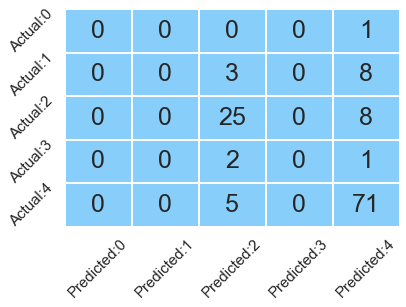

**************** CLASSIFICATION REPORT ****************
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        11
           2       0.71      0.76      0.74        33
           3       0.00      0.00      0.00         3
           4       0.80      0.93      0.86        76

    accuracy                           0.77       124
   macro avg       0.30      0.34      0.32       124
weighted avg       0.68      0.77      0.72       124
 
*******************************************************


In [164]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))
y_pred_svm = svm.predict(x_test)
plot_confusion_matrix(svm, y_pred_svm)
clrp = classification_report(y_test, y_pred_svm)
print('{} {} {}\n {} \n{}'.format('*'*16, 'CLASSIFICATION REPORT', '*'*16, clrp, '*'*55))

**GRADIENT BOOSTING CLASSIFIER:**

Gradient Boosting Accuracy:83.87%


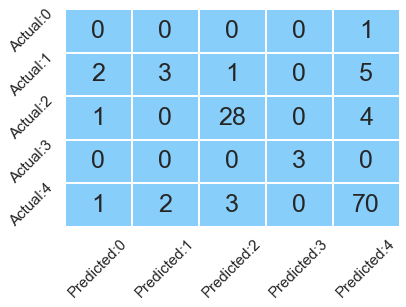

**************** CLASSIFICATION REPORT ****************
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.60      0.27      0.37        11
           2       0.88      0.85      0.86        33
           3       1.00      1.00      1.00         3
           4       0.88      0.92      0.90        76

    accuracy                           0.84       124
   macro avg       0.67      0.61      0.63       124
weighted avg       0.85      0.84      0.84       124
 
*******************************************************


In [165]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))
y_pred_gb = gbc.predict(x_test)
plot_confusion_matrix(gbc, y_pred_gb)
clrp = classification_report(y_test, y_pred_gb)
print('{} {} {}\n {} \n{}'.format('*'*16, 'CLASSIFICATION REPORT', '*'*16, clrp, '*'*55))

**EXTREME GRADIENT BOOSTING OR XGBCLASSIFIER:**

XGB Accuracy:83.06%


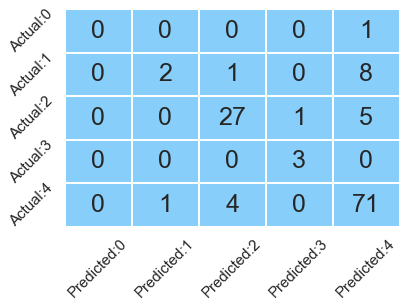

**************** CLASSIFICATION REPORT ****************
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.18      0.29        11
           2       0.84      0.82      0.83        33
           3       0.75      1.00      0.86         3
           4       0.84      0.93      0.88        76

    accuracy                           0.83       124
   macro avg       0.62      0.59      0.57       124
weighted avg       0.81      0.83      0.81       124
 
*******************************************************


In [166]:
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))
y_pred_xgb = xgb.predict(x_test)
plot_confusion_matrix(xgb, y_pred_xgb)
clrp = classification_report(y_test, y_pred_xgb)
print('{} {} {}\n {} \n{}'.format('*'*16, 'CLASSIFICATION REPORT', '*'*16, clrp, '*'*55))

# 10.CHECKING FOR THE USER INPUT:

In [167]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
